# About my client: 

Erin Robinson is a socially responsible home buyer and small-scale investor. Her mission is to identify undervalued homes in lower-income neighborhoods—not to exploit them, but to help uplift them. Erin seeks to purchase affordable properties, make modest improvements that enhance living conditions, and resell them at fair prices with only a small profit. Her goal is to contribute positively to communities by maintaining housing affordability and improving neighborhood quality without triggering aggressive gentrification.

# Project Overview: Affordable Housing Insights for Erin 

In this notebook, I will analyze housing data to support Erin Robinson’s mission of investing ethically in poor neighborhoods. The analysis will focus on identifying:

- Lower-priced neighborhoods with potential for community improvement

- Homes that are undervalued compared to local market averages

- Effects on the price of houses when increasing their quality 


The goal is to generate data-driven insights that align with Erin's socially responsible approach: making small improvements, supporting communities, and keeping housing affordable.

#  Data Preparation and Exploration


In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df=pd.read_csv(r"C:\Users\T495\Desktop\Floppy\Neue_Fische\EDA_project\ds-eda-project-Florencia\data\eda.csv")

Lets first explore the data set:

In [4]:
df.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Check if 'house_id' and 'id.1' are duplicates:

df['house_id'].equals(df['id.1'])                               # They are!

True

In [6]:

df.drop(columns='id.1', inplace=True)                         # drop one of them 

In [7]:
# Check the size of the data set
df.shape

(21597, 22)

In [8]:
# Get insights about data type and non-null counts of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   bedrooms       21597 non-null  float64
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  float64
 7   sqft_lot       21597 non-null  float64
 8   floors         21597 non-null  float64
 9   waterfront     19206 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  float64
 14  sqft_basement  21145 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17749 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [9]:
# Get some simple statistics for each column 
df.describe()

,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


In [10]:
# View of the first 10 rows
df.head(10)

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,3.000,1.000,1180.000,5650.000,1.000,NaN,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,3.000,2.250,2570.000,7242.000,2.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,2.000,1.000,770.000,10000.000,1.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,4.000,3.000,1960.000,5000.000,1.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,3.000,2.000,1680.000,8080.000,1.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
5,2014-05-12,1230000.000,7237550310,6,4.000,4.500,5420.000,101930.000,1.000,0.000,...,11,3890.000,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000
6,2014-06-27,257500.000,1321400060,7,3.000,2.250,1715.000,6819.000,2.000,0.000,...,7,1715.000,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000
7,2015-01-15,291850.000,2008000270,8,3.000,1.500,1060.000,9711.000,1.000,0.000,...,7,1060.000,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000
8,2015-04-15,229500.000,2414600126,9,3.000,1.000,1780.000,7470.000,1.000,0.000,...,7,1050.000,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000
9,2015-03-12,323000.000,3793500160,10,3.000,2.500,1890.000,6560.000,2.000,0.000,...,7,1890.000,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000


In [11]:
# Check is there are duplicated rows in the data frame
df.duplicated().value_counts()                                          # There are not!

False    21597
Name: count, dtype: int64

In [12]:
# Check data types in data frame
df.dtypes

date              object
price            float64
house_id           int64
id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

Let us make sure that "date" is in a convenient format to work with it

In [13]:
# type of first date entry
print()
print("The data type of the column date is:",type(df['date'][0]))


The data type of the column date is: <class 'str'>


In [14]:
# Let us change "date" dtype to datetime format

df['date'] = pd.to_datetime(df['date'])
print()
print("Now, data type of the column date is:",type(df['date'][0]))


Now, data type of the column date is: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


Now, it is important to check for NaN entries:

In [15]:
df.isna().sum()

date                0
price               0
house_id            0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

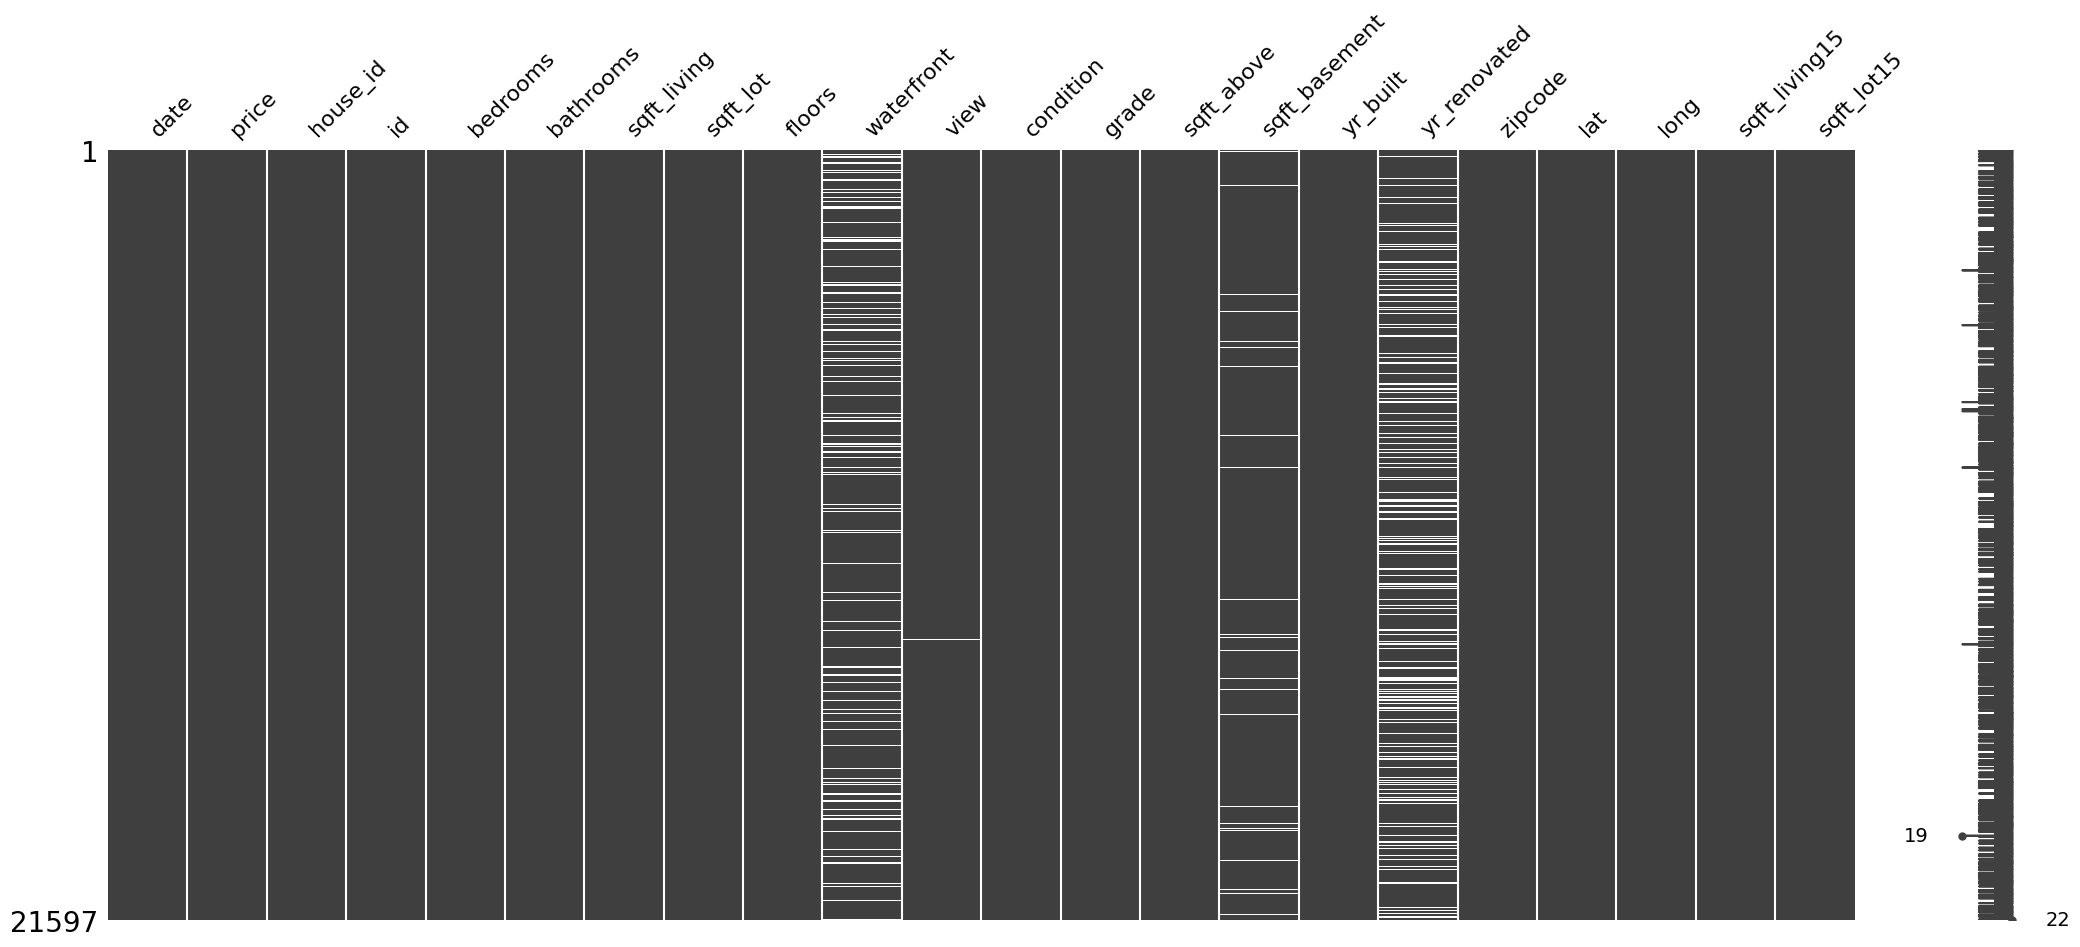

In [16]:
# Plot the missing value matrix to get a better understanding of the missing data
msno.matrix(df)
plt.show()

The visualization did not reveal any clear or consistent patterns in the missingness. The NaN values appear to be randomly distributed across the dataset.

<Axes: >

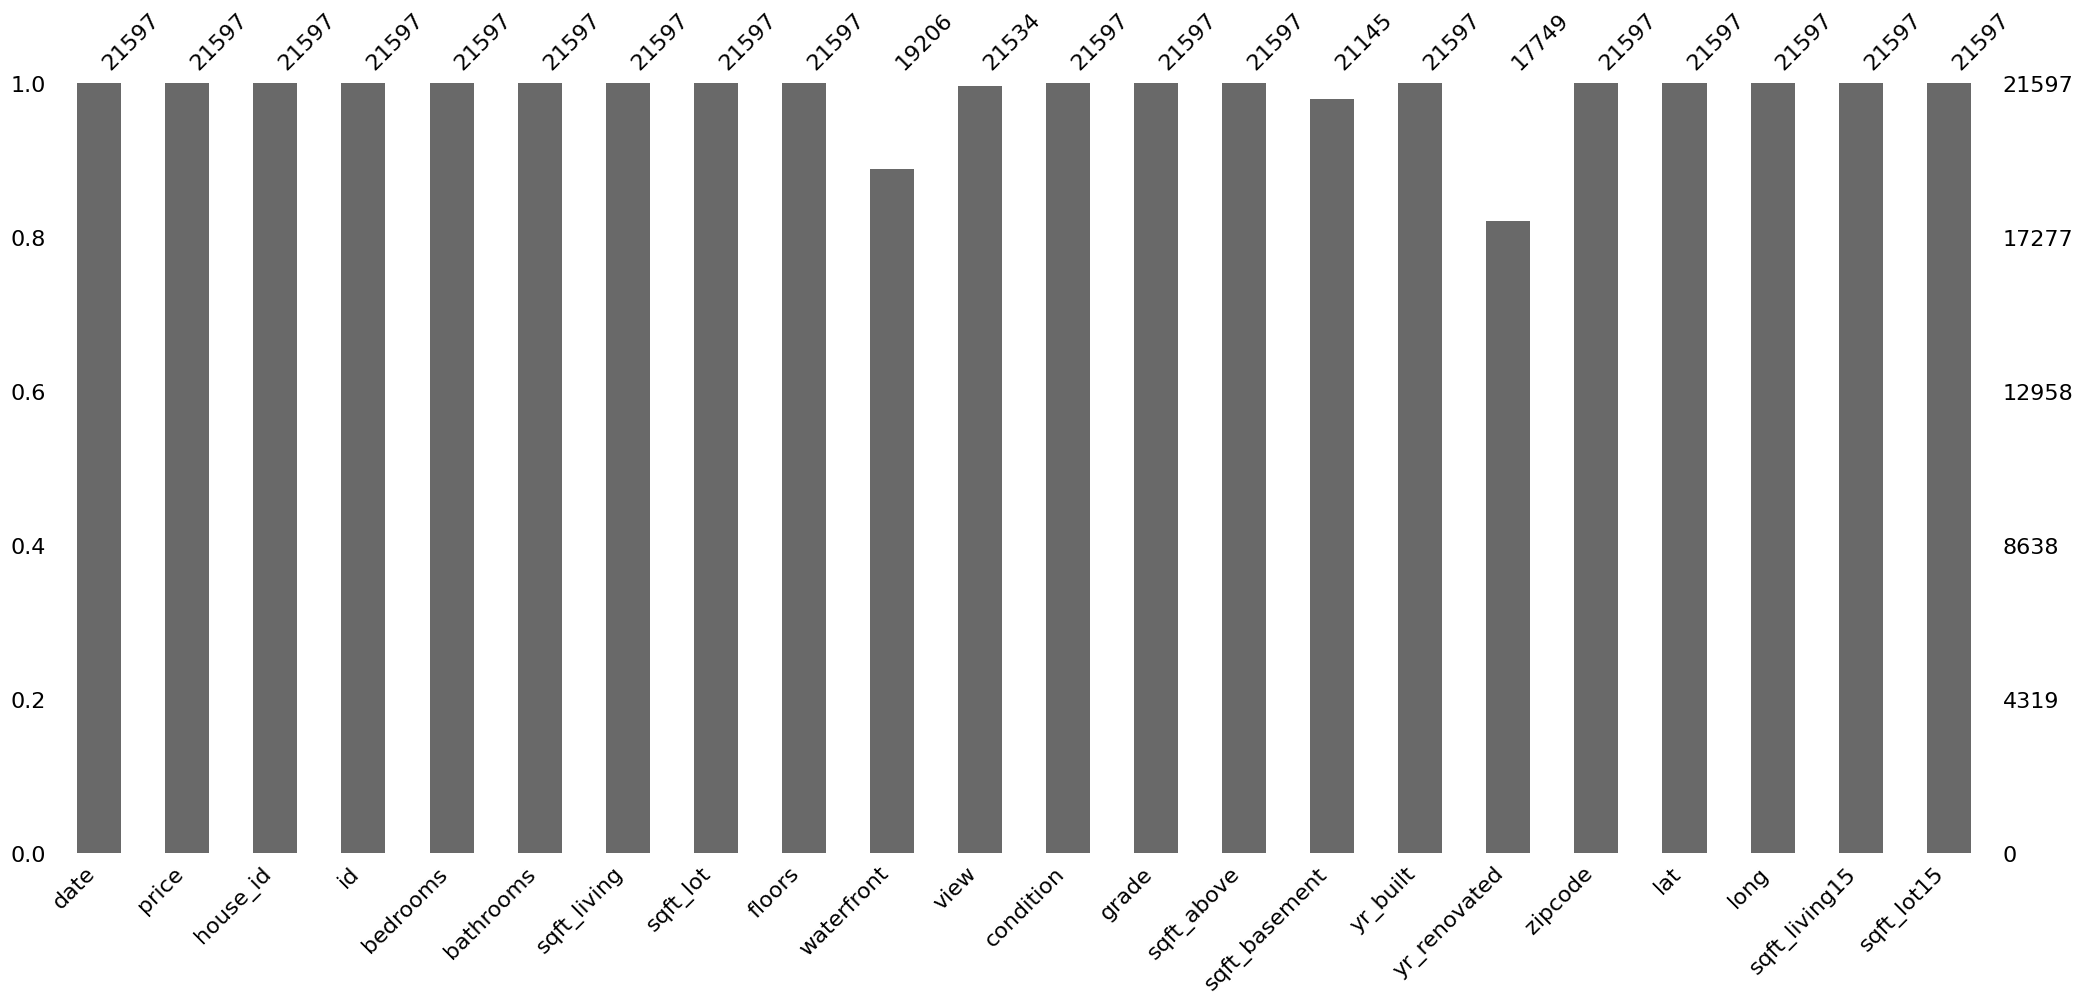

In [17]:
# Check the percentage of data missing per column 
msno.bar(df)

- There are many NaN values in the yr_renovated column. For what I researched, this typically indicates that the houses were never renovated, so I will replace these with cero.

- Similarly, for sqft_basement, I will assume that missing values imply the home does not have a basement (Also replace with cero).

- The waterfront column also contains missing data. I’ll treat these as non-waterfront properties, especially since this variable may not be central to my analysis (Also replace with cero).

- As for view, missing values likely suggest the home doesn't have a notable view—though this is a less certain assumption. Still, for consistency, I’ll treat NaN values here as having no nice view (Also replace with cero).

In [18]:
#Fill all missing data with ceros
df = df.fillna(0)

# Let us now check distributions of the continuous variables

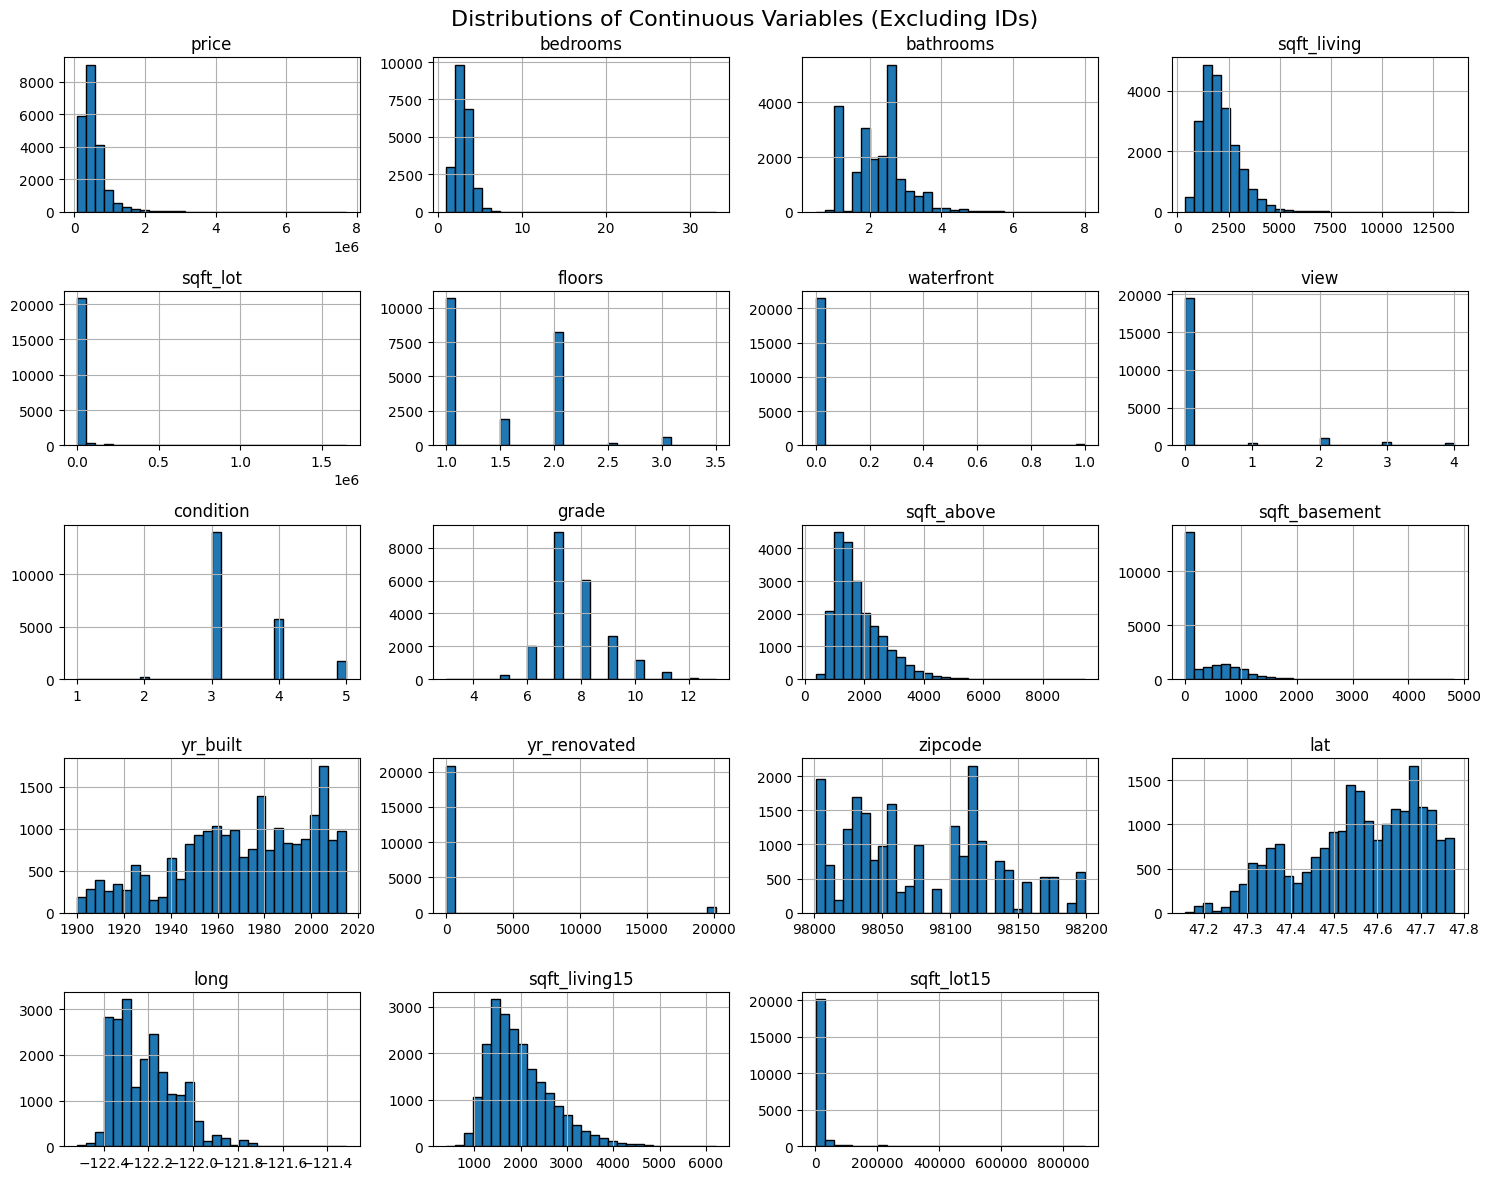

In [19]:
# Columns to exclude from histograms
exclude_cols = ['id', 'id.1', 'house_id']

# Select continuous columns
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns
continuous_cols = [col for col in continuous_cols if col not in exclude_cols]

# Plot histograms
df[continuous_cols].hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle('Distributions of Continuous Variables (Excluding IDs)', fontsize=16)
plt.tight_layout()
plt.show()

# Relationships in the data

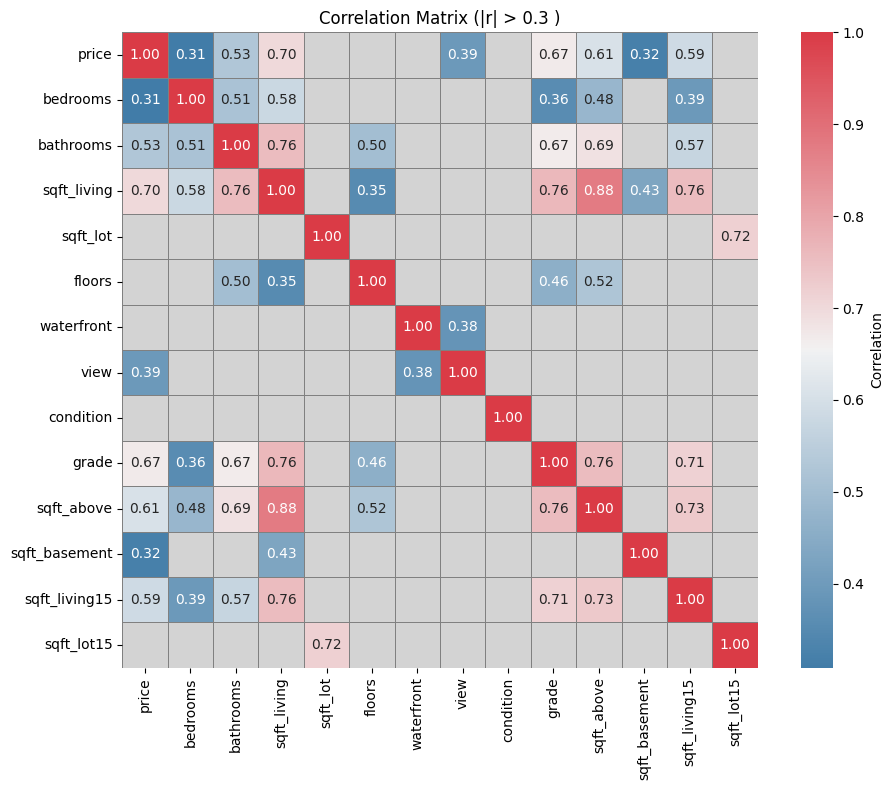

In [20]:
# Here I will first drop non-informative columns
columns_to_drop = ['id', 'house_id', 'lat', 'long', 'renovated', 'yr_built', 'yr_renovated', 'zipcode']
df_corr = df.drop(columns=columns_to_drop, errors='ignore')

# Now, compute correlation matrix
corr_matrix = df_corr.corr(numeric_only=True)
threshold = 0.3
weak_mask = np.abs(corr_matrix) <= threshold

# Plot only strong correlations
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=sns.diverging_palette(240, 10, as_cmap=True),
    mask=weak_mask,
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={'label': 'Correlation'})

# Overlay the weak correlations as gray
sns.heatmap(
    weak_mask,
    cmap=['lightgray'],
    cbar=False,
    linewidths=0.5,
    linecolor='gray',
    square=True,
    mask=~weak_mask  # only color where weak_mask is True
)

plt.title('Correlation Matrix (|r| > 0.3 )')
plt.tight_layout()
plt.show()


At first glance some strong correlations observed include:

- Price vs. sqft_living: Larger homes seem to tend to cost more.
- Price vs. grade: Higher quality homes seem to have higher prices.
- Bathrooms vs. sqft_living: Bigger homes probably have more bathrooms.
- Bathrooms vs. grade: Higher-grade homes probably include more bathrooms.
- Grade vs. sqft_living: Better-grade homes seem to be generally larger.
- Sqft_living15 vs. grade: Neighborhood home sizes seem to have an effect on grades.
- Sqft_lot15 vs. sqft_lot: Lot sizes are provably similar across nearby properties

These could be interesting hypotheses to explore, but since my client is Erin, my focus is on insights that align with her goals—for example, identifying the poorest neighborhoods in King County where she can invest and make a positive impact.

# Hypotheses

- 1st hypothesis: "Low-priced homes cluster in specific geographic areas"

Lets check if this could be true, and where!

In [21]:
# Define threshold for identifying poor neighborhoods based on the 25th percentile of overall house prices

price_threshold = df['price'].quantile(0.05)
print(f"The chosen price treschhold is: {price_threshold}")

# Filter low-priced houses
low_price_homes = df[df['price'] <= price_threshold]

low_price_homes

The chosen price treschhold is: 210000.0


,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,2015-02-25,180000.000,5631500400,3,2.000,1.000,770.000,10000.000,1.000,0.000,...,6,770.000,0.000,1933,0.000,98028,47.738,-122.233,2720.000,8062.000
18,2014-12-05,189000.000,16000397,19,2.000,1.000,1200.000,9850.000,1.000,0.000,...,7,1200.000,0.000,1921,0.000,98002,47.309,-122.210,1060.000,5095.000
68,2014-08-25,204000.000,1274500060,69,3.000,1.000,1000.000,12070.000,1.000,0.000,...,7,1000.000,0.000,1968,0.000,98042,47.362,-122.110,1010.000,12635.000
92,2015-02-26,153000.000,4168000060,93,3.000,1.000,1200.000,10500.000,1.000,0.000,...,7,1200.000,0.000,1962,0.000,98023,47.322,-122.351,1350.000,10500.000
97,2014-09-12,199000.000,1099611230,98,4.000,1.500,1160.000,6400.000,1.000,0.000,...,7,1160.000,0.000,1975,0.000,98023,47.304,-122.378,1160.000,6400.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20791,2014-07-28,182568.000,6056100160,20792,4.000,1.500,1500.000,2106.000,2.000,0.000,...,7,1500.000,0.000,2014,0.000,98108,47.567,-122.297,1490.000,2175.000
20803,2014-09-19,208800.000,3336500140,20804,3.000,2.500,1390.000,2450.000,2.000,0.000,...,7,1390.000,0.000,2009,0.000,98118,47.530,-122.269,1390.000,2450.000
20946,2015-03-11,110000.000,1278000210,20947,2.000,1.000,828.000,4524.000,1.000,0.000,...,6,828.000,0.000,1968,20070.000,98001,47.266,-122.244,828.000,5402.000
20953,2015-03-26,193000.000,2781270530,20954,2.000,1.750,910.000,2550.000,1.000,0.000,...,6,910.000,0.000,2004,0.000,98038,47.349,-122.022,1310.000,2550.000


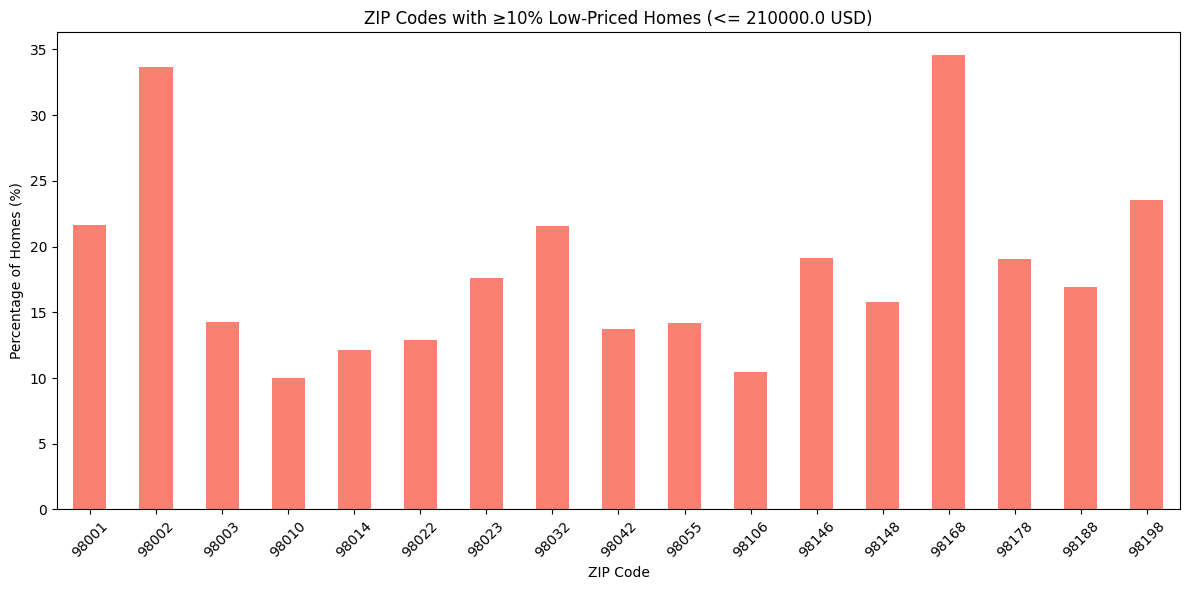

In [22]:
# Find total homes per ZIP code
total_by_zip = df['zipcode'].value_counts().sort_index()

# Low-priced homes per ZIP
low_price_by_zip = low_price_homes['zipcode'].value_counts().sort_index()

# Percentage of low-priced homes per ZIP
pct_low_price = (low_price_by_zip / total_by_zip * 100)
# Only keep ZIP codes where ≥ 10% of homes are low-priced
filtered_pct_low_price = pct_low_price[pct_low_price >= 10]  

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
filtered_pct_low_price.plot(kind='bar', color='salmon')
plt.title(f'ZIP Codes with ≥10% Low-Priced Homes (<= {price_threshold} USD)')
plt.xlabel('ZIP Code')
plt.ylabel('Percentage of Homes (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In the following cell, I identify the ZIP codes with a significant number of low-priced homes (>=50), calculate centroid (average geographic coordinates) for each of these ZIPs, and then plot all homes and highlights the low-priced ones on a map with ZIP code labels at their centroids.

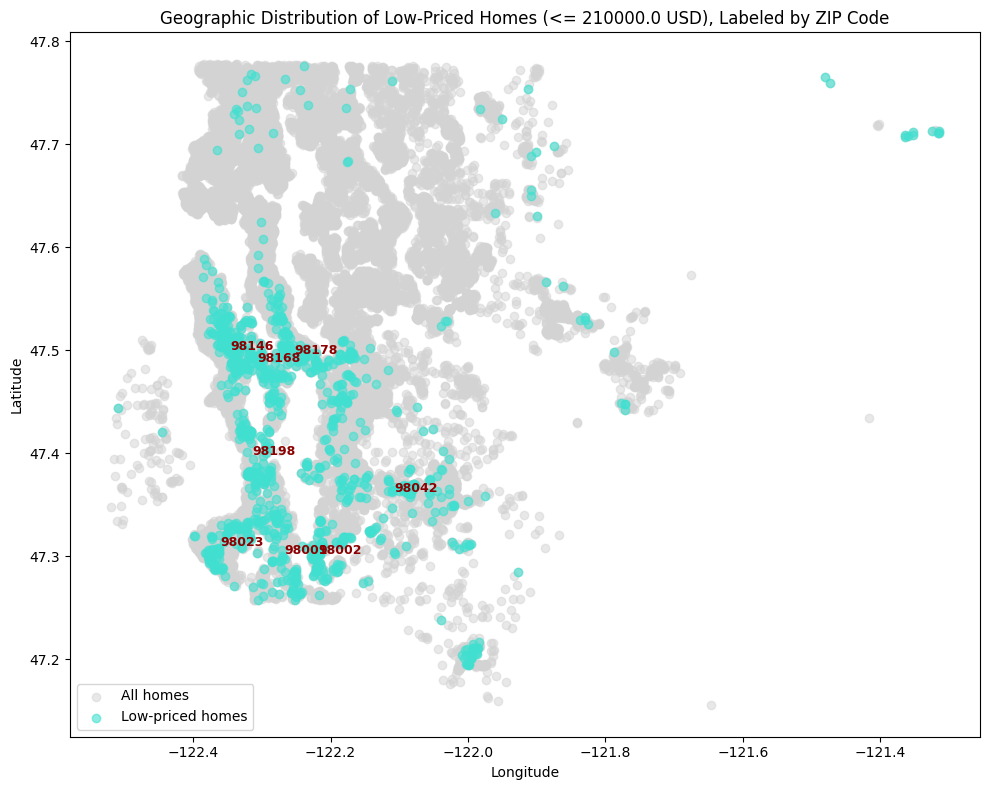

In [23]:
# From the low-priced homes subset, I select ZIP codes with at least 50 low-priced homes 

counts = low_price_homes['zipcode'].value_counts()
relevant_zips = counts[counts >= 50].index
zip_centers = low_price_homes[low_price_homes['zipcode'].isin(relevant_zips)].groupby('zipcode')[['lat', 'long']].mean()

plt.figure(figsize=(10,8))

# Plot all homes
plt.scatter(df['long'], df['lat'], c='lightgray', alpha=0.5, label='All homes')

# Plot low-priced homes
plt.scatter(low_price_homes['long'], low_price_homes['lat'], c='turquoise', alpha=0.6, label='Low-priced homes')

# Add ZIP code labels at centroid positions
for zip_code, row in zip_centers.iterrows():
    plt.text(row['long'], row['lat'], str(zip_code), fontsize=9, fontweight='bold', color='darkred')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Geographic Distribution of Low-Priced Homes (<= {price_threshold} USD), Labeled by ZIP Code')
plt.legend()
plt.tight_layout()
plt.show()

There appear to be specific geographic areas in King County where lower-priced homes (below $210,000) are concentrated. This is a valuable insight for Erin, as the ZIP codes shown in the graph each contain at least 50 low-priced listings—highlighting potential target neighborhoods for affordable investment.

- 2nd Hypothesis: "The median home price in a neighborhood is correlated with the overall condition and grade of its houses."

Potentially, this could help Erin to identify areas with room for modest improvement

In [24]:
# Group by ZIP and calculate medians of price, grade and condition
zip_summary = df.groupby('zipcode').agg({
    'price': 'median',
    'grade': 'median',
    'condition': 'median'
}).reset_index()

In [25]:
# See the correlations
print(zip_summary[['price', 'grade']].corr())

       price  grade
price  1.000  0.744
grade  0.744  1.000


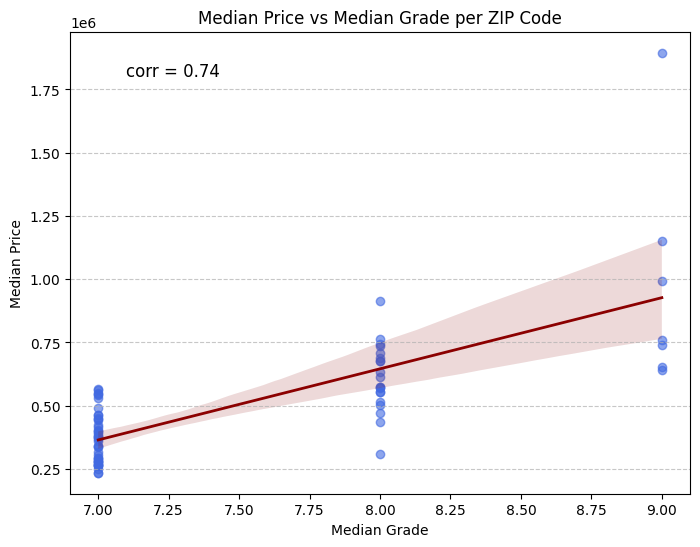

In [26]:

# Plot with regression line and correlation value for median price vs median grade per ZIP
plt.figure(figsize=(8,6))
sns.regplot(
    data=zip_summary,
    x='grade',
    y='price',
    scatter_kws={'color': 'royalblue', 'alpha': 0.6},
    line_kws={'color': 'darkred', 'linewidth': 2}
)
plt.title('Median Price vs Median Grade per ZIP Code')
plt.xlabel('Median Grade')
plt.ylabel('Median Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.text(
    x=zip_summary['grade'].min() + 0.1,
    y=zip_summary['price'].max() * 0.95,
    s="corr = 0.74",
    fontsize=12,
    color='black'
)

plt.show()

Let us observe also, the distribution of house prices by grade with a box plot

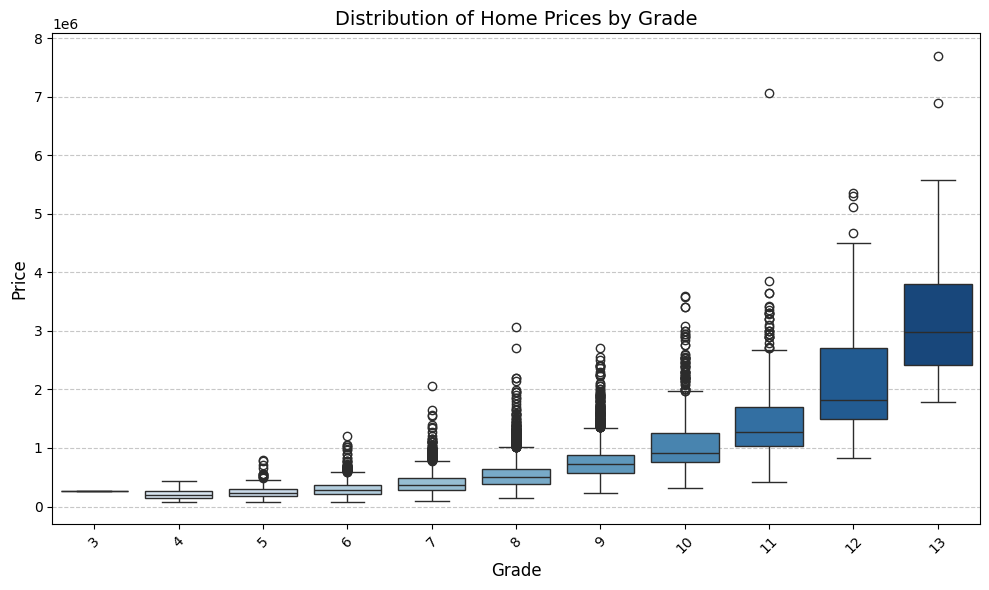

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='grade', y='price', palette='Blues')

plt.title('Distribution of Home Prices by Grade', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

We can conclude that the second hypothesis is true. Across ZIP codes, there is a strong positive correlation (≈ 0.7) between the median grade and the median house price. 

This can be a valuable insight for Erin: when considering home renovations, focusing on improvements that raise a home's grade may have a stronger impact on its market value. 

- 3rd Hypothesis: " Among the cheapest and non-renovated homes, older houses are cheaper than newer ones of similar size."

For the following analysis, I will focus on homes priced below the 25th percentile of the entire dataset. To ensure a fair comparison, we limit the analysis to houses of similar size—specifically, those within ±100 square feet of the median size among these low-priced homes.

In [ ]:
# Bottom 25% of prices
price_q1 = df['price'].quantile(0.05)

print(price_q1)

cheap_houses = df[df['price'] <= price_q1]

print(cheap_houses.mean())

print("I consider",len(cheap_houses), "houses")

# Median size of these cheap houses
typical_size = cheap_houses['sqft_living'].median()
print(f"Median size of cheap homes: {typical_size}")

210000.0
date             2014-10-27 10:41:10.653173760
price                               177151.590
house_id                        4415887561.860
id                                    9936.479
bedrooms                                 2.738
bathrooms                                1.282
sqft_living                           1157.624
sqft_lot                             11169.519
floors                                   1.115
waterfront                               0.000
view                                     0.010
condition                                3.380
grade                                    6.361
sqft_above                            1094.514
sqft_basement                           62.217
yr_built                              1956.105
yr_renovated                           402.052
zipcode                              98080.750
lat                                     47.418
long                                  -122.235
sqft_living15                         1350.815
sqft

In [72]:
#Let’s allow ±100 sqft around that value:
size_window = 100
min_size = typical_size - size_window
max_size = typical_size + size_window

# Filter all houses in this size range
similar_size_homes = cheap_houses[
    (cheap_houses['sqft_living'] >= min_size) &
    (cheap_houses['sqft_living'] <= max_size)
]

In [73]:
# We keep only unrenovated homes
similar_size_homes['renovated'] = similar_size_homes['yr_renovated'] > 0
unrenovated = similar_size_homes[similar_size_homes['renovated'] == False]

print("non-renovated", len(unrenovated))

# Age groups
unrenovated['age_group'] = pd.cut(
    unrenovated['yr_built'],
    bins=[0, 1950, 1970, 1990, 2010, 2025],
    labels=['<1950', '1950-70', '1970-90', '1990-2010', '>2010']
)

non-renovated 292


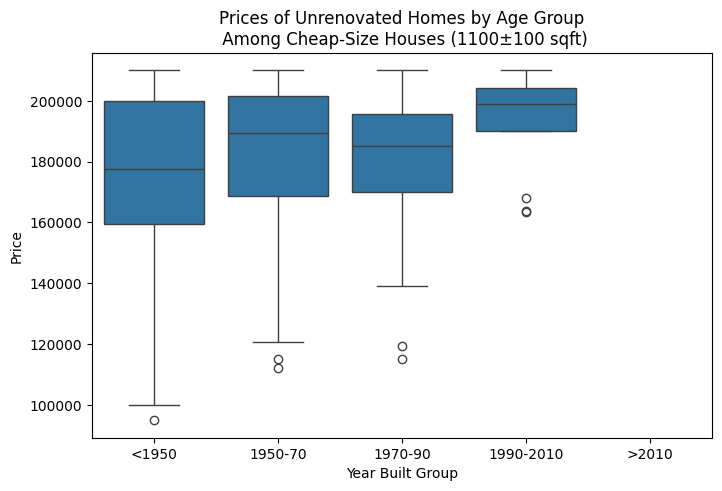

In [75]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='age_group', y='price', data=unrenovated)
plt.title('Prices of Unrenovated Homes by Age Group\n Among Cheap-Size Houses (1100±100 sqft)')
plt.xlabel('Year Built Group')
plt.ylabel('Price')
plt.show()

WRITE HERE MORE !

# Questions that Erin Robinson might have asked me, and my insights for her

- Question 1: Which neighborhoods should I target? Remmeber, I am interested in poor neighborhoods

She could target the ZIP codes found durign the testing of the first hypothesis. But for a bigger list lets see the following:

In [39]:
# Check the meadian price of houses for zip code and look for the lowest ones
zip_price_median = df.groupby('zipcode')['price'].median().sort_values()
poor_zipcodes = zip_price_median.head(20)  # Bottom 20 zip codes
poor_zipcodes

# Create a DataFrame from the Series for better formatting
poor_zipcodes_df = poor_zipcodes.reset_index()
poor_zipcodes_df.columns = ['ZIP Code', 'Median Price']

# Format and display the table nicely
poor_zipcodes_df.style.format({'Median Price': '${:,.0f}'}).set_caption("Bottom 20 ZIP Codes by Median House Price")


,ZIP Code,Median Price
0,98002,"$235,000"
1,98168,"$235,000"
2,98032,"$249,000"
3,98001,"$260,000"
4,98188,"$264,000"
5,98198,"$265,000"
6,98003,"$267,475"
7,98023,"$268,450"
8,98148,"$278,000"
9,98178,"$278,277"


- Question 2: Within the poor neighborhoods identified, are there homes that appear undervalued compared to others nearby and could be improved affordably?

In [47]:
# Convert the poorest ZIP codes into a list
list_poor_zip_codes = poor_zipcodes.index.tolist()

# Filter the main DataFrame to include only homes in poor ZIP codes
df_poor = df[df['zipcode'].isin(list_poor_zip_codes)]
df_poor

# Calculate price per square foot for each home, to compare better: normalizes for the size of the houses
df_poor['price_per_sqft'] = df_poor['price'] / df_poor['sqft_living']

# Compute median price per square foot for each poor ZIP code
zip_medians = df_poor.groupby('zipcode')['price_per_sqft'].median().reset_index()
zip_medians.columns = ['zipcode', 'median_ppsqft']


In [48]:
# Merge back to main df_poor
df_poor = df_poor.merge(zip_medians, on='zipcode')

# Find homes that are under the local median (e.g. 50% or more below)
df_poor['undervalued'] = df_poor['price_per_sqft'] < 0.5 * df_poor['median_ppsqft']
undervalued_homes = df_poor[df_poor['undervalued']]

In [51]:
# Select a subset of undervalued homes that have not been renovated and have fair or poor grade (7 or below)
undervalued_targets = undervalued_homes[
    (undervalued_homes['yr_renovated'] == 0) &  # Never renovated
    (undervalued_homes['grade'] <= 7)           # Grade 7 or lower: average or below
]


# Define columns that are not needed for further analysis
excluded_cols = ['id', 'date', 'yr_renovated', "waterfront", "undervalued"]

# Drop the unnecessary columns from the DataFrame (ignore any that are missing)
undervalued_targets = undervalued_targets.drop(columns=excluded_cols, errors='ignore')


undervalued_targets_table = undervalued_targets[["house_id", "zipcode", "grade", "price_per_sqft", "median_ppsqft"]].set_index("house_id")
undervalued_targets_table



,zipcode,grade,price_per_sqft,median_ppsqft
house_id,,,,
1823049202,98146,7,90.674,201.821
723049156,98146,6,87.647,201.821
3883800011,98146,6,95.349,201.821
723049326,98146,6,89.701,201.821
2113700360,98106,7,100.962,215.909
6453300306,98106,7,96.544,215.909
723049158,98146,5,92.466,201.821
6121800050,98148,7,89.862,181.423


Here we identify specific homes that Erin could potentially purchase, improve, and resell at a modest profit—while remaining within the median price range of their respective neighborhoods.

- Question3: How would small improvements increase home value? I do not want to make prices too high for the community (Only for the poor neighborhoods)

As shown in the correlation matrix at the beginning of this notebook, house grade is strongly correlated with features like square footage and number of bathrooms. Erin may consider these aspects when planning renovations to raise a home's grade—and, as previously demonstrated, its market value. 

However, my current focus is to estimate how increasing a home's grade (by one level), in low-income neighborhoods, could impact its final selling price.

In [330]:
# Calculate the median price per ZIP code and house grade, then reshape the result
grade_price_poor = df_poor.groupby(['zipcode', 'grade'])['price'].median().unstack()

# Keep only ZIP codes where both grade 7 and grade 8 houses exist (to make comparisons)
grade_jump_poor = grade_price_poor[[7, 8]]

# Compute the price difference between grade 8 and grade 7 houses within each ZIP
grade_jump_poor['diff_7_to_8'] = grade_jump_poor[8] - grade_jump_poor[7]

# Display the average price increase when upgrading from grade 7 to 8 in poor neighborhoods
print("Average price increase (grade 7→8) in poor ZIPs:", grade_jump_poor['diff_7_to_8'].mean())

Average price increase (grade 7→8) in poor ZIPs: 72034.625


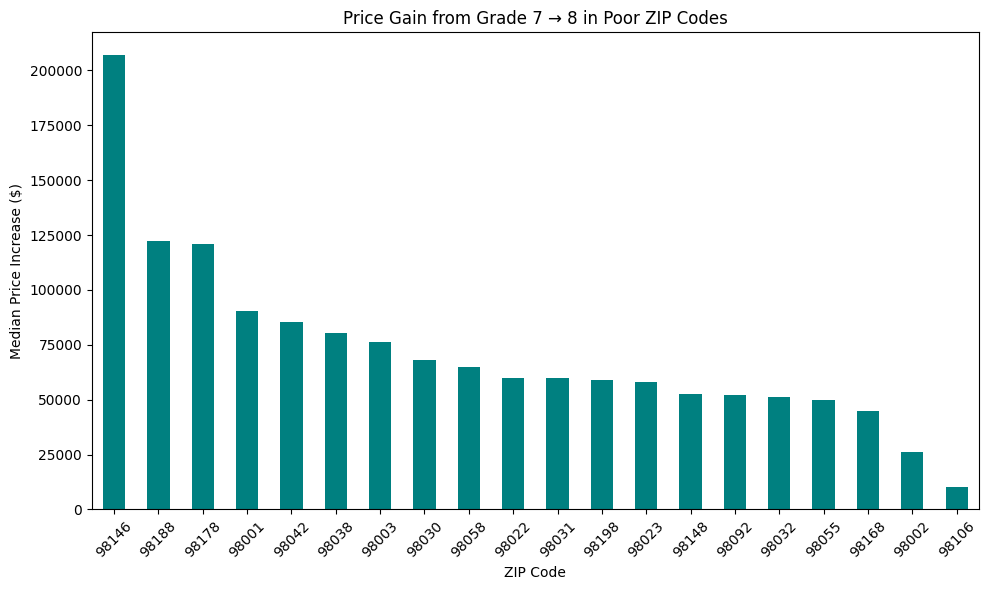

In [331]:
# Plot a bar chart of the median price increase from grade 7 to 8, sorted from highest to lowest

plt.figure(figsize=(10,6))
grade_jump_poor['diff_7_to_8'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Price Gain from Grade 7 → 8 in Poor ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Median Price Increase ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

When renovating homes, Erin should consider that increasing a property's grade from 6 to 7 could lead to an average price increase of approximately 72,035 USD. However, she may prefer targeting neighborhoods where the price jump is more modest—such as ZIP codes 98002 and 98106—to maintain affordability.

- Question 4: Which neighborhoods have room for improvement? Are there ZIP codes where homes are mostly low grade, poor condition, not renovated?

In [58]:
low_quality = df[
    (df['grade'] <= 5) &
    (df['condition'] <= 3) &
    (df['yr_renovated'] == 0)  
]

low_quality_counts = low_quality['zipcode'].value_counts()
total_counts = df['zipcode'].value_counts()

# Proportion of low quality homes per ZIP
low_quality_pct = (low_quality_counts / total_counts)

summary = pd.DataFrame({
    'total_homes': total_counts,
    'low_quality_homes': low_quality_counts,
    'pct_low_quality': low_quality_pct*100
}).fillna(0)

# Sort ZIPs with highest percentage of low quality homes first
summary = summary.sort_values(by='pct_low_quality', ascending=False)
print(summary.head(10))

         total_homes  low_quality_homes  pct_low_quality
zipcode                                                 
98014            124              8.000            6.452
98168            269             12.000            4.461
98146            288             11.000            3.819
98148             57              2.000            3.509
98055            268              8.000            2.985
98106            335              9.000            2.687
98108            186              4.000            2.151
98065            308              6.000            1.948
98070            117              2.000            1.709
98188            136              2.000            1.471


For more impactful humanitarian efforts, she can focus on this neighborhoods (ZIP codes) where there are houses in poor condition, with low grades, and that were never renovated, ie. low-quality homes.